## Loan Prediction

The dataset contains information about the applicant and co applicant if any, loan amount and term applied and the status whether the loan was accepted or rejected.
Our task is to build a model which takes all the inputs of the applicants and co applicant and predicts whether loan has to be provided to the person or not.

This is a classification problem and we will be using the classification algorithms to build the model.


In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the dataset
df=pd.read_csv("loan_prediction.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
#checking the shape of the dataset
df.shape
#There are 614 rows and 13 columns in the dataset

(614, 13)

In [4]:
#checking the datatype 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


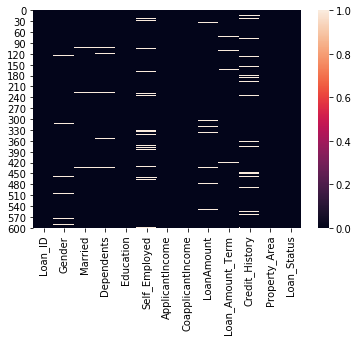

In [8]:
#Checking if there any missing values
sns.heatmap(df.isnull())

In [5]:
df.isnull().sum()
#There are few missing values in the dataset

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
for i in df.columns:
    print(df[i].value_counts())
    print()

LP001027    1
LP002928    1
LP002170    1
LP001401    1
LP001207    1
           ..
LP002129    1
LP001574    1
LP001859    1
LP002979    1
LP001841    1
Name: Loan_ID, Length: 614, dtype: int64

Male      489
Female    112
Name: Gender, dtype: int64

Yes    398
No     213
Name: Married, dtype: int64

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

No     500
Yes     82
Name: Self_Employed, dtype: int64

2500    9
4583    6
2600    6
6000    6
5000    5
       ..
5818    1
5819    1
5821    1
2750    1
3691    1
Name: ApplicantIncome, Length: 505, dtype: int64

0.0       273
1666.0      5
2083.0      5
2500.0      5
1750.0      3
         ... 
7166.0      1
2138.0      1
2166.0      1
3541.0      1
3021.0      1
Name: CoapplicantIncome, Length: 287, dtype: int64

120.0    20
110.0    17
100.0    15
187.0    12
160.0    12
         ..
570.0     1
300.0     1
376.0     1
117.0     1
311.0     1

Observations:-
1. There are 489 male and 112 female applicants.
2. The married applicants are 398 and 213 are single
3. The graduate applicants are 480 and non graduate are 134.
4. 345 applicants have no dependents, 102 have one, 101 have two and 51 have 3+ dependents.
5. 475 have credit history and 89 have no credit history.
6. 233 have property in semi urban area, 202 in urban and 179 in rural area
7. 422 loan applications have been approved and 192 have been rejected


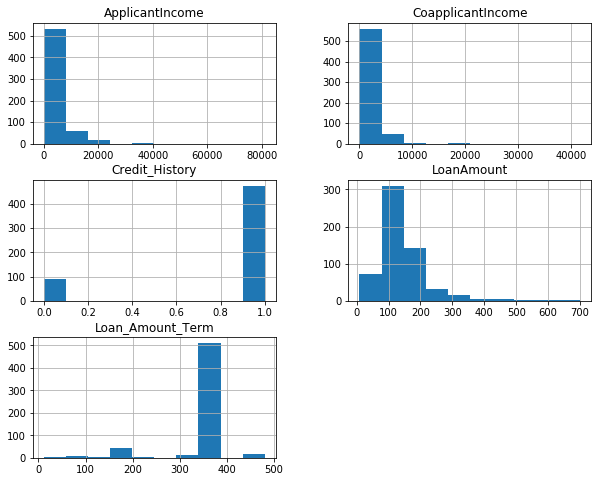

In [18]:
#Checking the distribution 
df.hist(figsize=(10,8))
plt.show()
#many columns are not distributed symmetrically and needs to be treated later

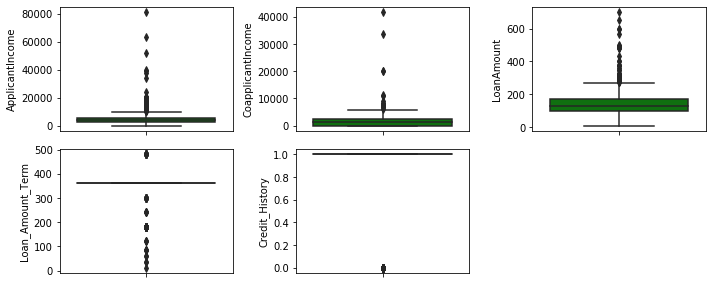

In [22]:
col_list=df.columns.values
plt.figure(figsize=(10,8))
for i in range (0,len(col_list)):
    if df[col_list[i]].dtype!='O':
        plt.subplot(4,3,i+1)
        sns.boxplot(df[col_list[i]], color='green',orient='v')
        plt.tight_layout()

In [ ]:
#There are outliers in the data which needs to be removed later.

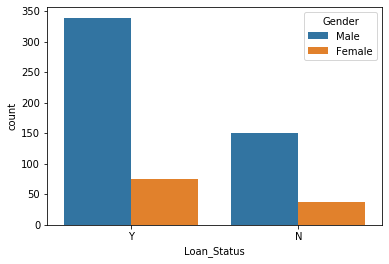

In [28]:
sns.countplot(df['Loan_Status'], hue=df['Gender'])

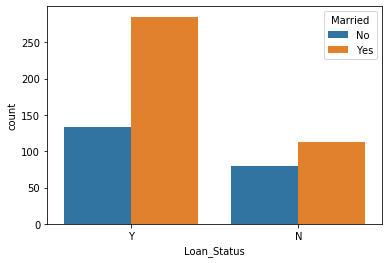

In [30]:
sns.countplot(df['Loan_Status'], hue=df['Married'])

#### Statistical Analysis

In [31]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Observation
1. The mean income of the applicant is 5403 and that of co applicant is 1621.
2. The avg loan amount applied is 146. The maximum being 700 and minimum being 9.
3. Max term of loan applied is 40 years, the minimum being one year and average being 28.5 years.

#### Bivariate Analysis

In [33]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [34]:
df.groupby('Loan_Status').mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,
N,5446.078125,1877.807292,151.220994,344.064516,0.541899
Y,5384.068720,1504.516398,144.294404,341.072464,0.981818


Observations
1. The loan application which have been rejected, the average applicant income and co applicant income seems to be higher than those loan have been approved. This is not giving us the reason or criteria for rejection. And the credit history of rejected is less than those who have been approved. The loan amount term and loan amount is slightly higher than the approved ones. 

Hence, the criteria for approval is not clear from the data.

In [35]:
df.groupby('Gender').mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Gender,,,,,
Female,4643.473214,1108.008929,126.697248,352.293578,0.831683
Male,5446.460123,1742.932352,149.265957,339.665272,0.847007


In [36]:
df.groupby('Education').mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Education,,,,,
Graduate,5857.433333,1717.474833,154.060215,344.669492,0.857788
Not Graduate,3777.283582,1276.544776,118.409449,332.156250,0.785124


Observation:
1. Graduates are earning more than non graduates and their average loan amount applied is also more than the not graduates.

In [38]:
df.groupby('Self_Employed').mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Self_Employed,,,,,
No,5049.748000,1580.989840,141.748963,343.263804,0.835853
Yes,7380.817073,1501.341463,172.000000,336.300000,0.840000


Observations:
1. The average income of applicants who are self employed are more than those who are not self employed.
2. The average Loan amount of the applicants who are self employed is more than those who are employed elsewhere. 

In [37]:
df.groupby('Dependents').mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Dependents,,,,,
0,4917.423188,1623.696000,135.886228,348.107784,0.857595
1,5962.274510,1426.235294,158.622449,329.346535,0.844444
2,4926.782178,1687.245544,150.224490,340.871287,0.852632
3+,8581.215686,2024.313725,190.897959,325.200000,0.770833


Observations
Where the dependents is more than 3+, the average applicant income is the highest at 8581. Similarly, the loan amount is also highest where dependents is more than 3+ and least for those who do not have dependents. But this group has least credit history at 0.77.

In [43]:
df[df['LoanAmount']>400].sort_values(by='ApplicantIncome')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
177,LP001610,Male,Yes,3+,Graduate,No,5516,11300.0,495.0,360.0,0.0,Semiurban,N
523,LP002693,Male,Yes,2,Graduate,Yes,7948,7166.0,480.0,360.0,1.0,Rural,Y
604,LP002959,Female,Yes,1,Graduate,No,12000,0.0,496.0,360.0,1.0,Semiurban,Y
432,LP002386,Male,No,0,Graduate,NaN,12876,0.0,405.0,360.0,1.0,Semiurban,Y
278,LP001907,Male,Yes,0,Graduate,No,14583,0.0,436.0,360.0,1.0,Semiurban,Y
487,LP002547,Male,Yes,1,Graduate,No,18333,0.0,500.0,360.0,1.0,Urban,N
561,LP002813,Female,Yes,1,Graduate,Yes,19484,0.0,600.0,360.0,1.0,Semiurban,Y
369,LP002191,Male,Yes,0,Graduate,No,19730,5266.0,570.0,360.0,1.0,Rural,N
130,LP001469,Male,No,0,Graduate,Yes,20166,0.0,650.0,480.0,NaN,Urban,Y
308,LP001996,Male,No,0,Graduate,No,20233,0.0,480.0,360.0,1.0,Rural,N


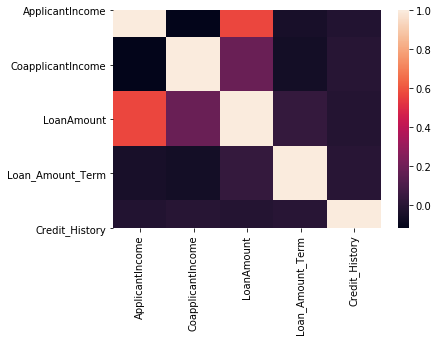

In [39]:
sns.heatmap(df.corr())

In [40]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


In [42]:
#Loan amount and applicant income show a positive correlation to some extent

#### Filling the missing values

In [48]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mean())

In [49]:
df.isnull().sum()
#All the null values are being filled

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [53]:
#Removing the unwanted column
#Loan Id is just a unique value assigned to each loan and it can be removed.
df=df.drop(['Loan_ID'],axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


#### LabelEncoder
We need to convert all the character data into numerical data for fitting into model

In [57]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
for i in df.columns:
    if df.columns.dtype=='O':
        df[i]=lb.fit_transform(df[i])

In [58]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,376,0,100,9,2,2,1
1,1,1,1,0,0,306,60,81,9,2,0,0
2,1,1,0,0,1,139,0,26,9,2,2,1
3,1,1,0,1,0,90,160,73,9,2,2,1
4,1,0,0,0,0,381,0,94,9,2,2,1


#### removing the outliers

In [61]:
from scipy.stats import zscore
z=np.abs(zscore(df))
print("The shape of dataset before removing the outliers is", df.shape)
df=df[(z<3).all(axis=1)]
print("The shape of dataset after removing the outliers is", df.shape)

The shape of dataset before removing the outliers is (614, 12)
The shape of dataset after removing the outliers is (602, 12)


#### checking the skewness

In [62]:
df.skew()

Gender              -1.646147
Married             -0.643625
Dependents           1.027516
Education            1.372199
Self_Employed        2.189792
ApplicantIncome      0.037182
CoapplicantIncome    0.772613
LoanAmount           0.471894
Loan_Amount_Term    -2.668469
Credit_History      -1.590563
Property_Area       -0.058757
Loan_Status         -0.803760
dtype: float64

In [63]:
#Using log1p function to remove the skewness
for i in df.columns:
    if df.skew()[i]>0.55:
        df[i]=np.log1p(df[i])

In [64]:
df.skew()

Gender              -1.646147
Married             -0.643625
Dependents           0.685099
Education            1.372199
Self_Employed        2.189792
ApplicantIncome      0.037182
CoapplicantIncome   -0.063374
LoanAmount           0.471894
Loan_Amount_Term    -2.668469
Credit_History      -1.590563
Property_Area       -0.058757
Loan_Status         -0.803760
dtype: float64

In [65]:
#Using sqrt function to remove the skewness further
for i in df.columns:
    if df.skew()[i]>0.55:
        df[i]=np.sqrt(df[i])

In [ ]:
#### Scaling the data
We need to scale the data to normalise all input variables.

In [70]:
#separating the input and output variables
x=df.iloc[:,0:-1]
y=pd.DataFrame(df.iloc[:,-1])
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0.000000,0.000000,0.000000,376,0.000000,100,9,2,2
1,1,1,0.832555,0.000000,0.000000,306,4.110874,81,9,2,0
2,1,1,0.000000,0.000000,0.832555,139,0.000000,26,9,2,2
3,1,1,0.000000,0.832555,0.000000,90,5.081404,73,9,2,2
4,1,0,0.000000,0.000000,0.000000,381,0.000000,94,9,2,2


In [71]:
y.head()

,Loan_Status
0,1
1,0
2,1
3,1
4,1


In [72]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=pd.DataFrame(scaler.fit_transform(x))
x.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1.0,0.0,0.000000,0.0,0.0,0.746032,0.000000,0.492611,0.8,1.0,1.0
1,1.0,1.0,0.707107,0.0,0.0,0.607143,0.726369,0.399015,0.8,1.0,0.0
2,1.0,1.0,0.000000,0.0,1.0,0.275794,0.000000,0.128079,0.8,1.0,1.0
3,1.0,1.0,0.000000,1.0,0.0,0.178571,0.897857,0.359606,0.8,1.0,1.0
4,1.0,0.0,0.000000,0.0,0.0,0.755952,0.000000,0.463054,0.8,1.0,1.0


#### Splitting the data into train test data

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, auc, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score


In [103]:
def max_acc_score(reg,x,y):
    max_score=0
    for r_state in range (42,101):
        train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state,test_size=0.20)
        reg.fit(train_x,train_y)
        pred=reg.predict(test_x)
        acc_score=accuracy_score(test_y,pred)
        print("The accuracy score at r_state", r_state, "is", acc_score)
        if acc_score>max_score:
            max_score=acc_score
            final_r_state=r_state
    print("The maximum accuracy score", max_score, "is achieved at", final_r_state)
    return max_score

In [75]:
lg=LogisticRegression()
max_acc_score(lg,x,y)

The accuracy score at r_state 42 is 0.8429752066115702
The accuracy score at r_state 43 is 0.8264462809917356
The accuracy score at r_state 44 is 0.8181818181818182
The accuracy score at r_state 45 is 0.743801652892562
The accuracy score at r_state 46 is 0.7933884297520661
The accuracy score at r_state 47 is 0.743801652892562
The accuracy score at r_state 48 is 0.8016528925619835
The accuracy score at r_state 49 is 0.7520661157024794
The accuracy score at r_state 50 is 0.8016528925619835
The accuracy score at r_state 51 is 0.7520661157024794
The accuracy score at r_state 52 is 0.743801652892562
The accuracy score at r_state 53 is 0.7933884297520661
The accuracy score at r_state 54 is 0.8264462809917356
The accuracy score at r_state 55 is 0.8347107438016529
The accuracy score at r_state 56 is 0.8264462809917356
The accuracy score at r_state 57 is 0.71900826446281
The accuracy score at r_state 58 is 0.859504132231405
The accuracy score at r_state 59 is 0.7603305785123967
The accuracy sco

0.8760330578512396

In [76]:
#Lets check the cross val score for the same
cvscore=cross_val_score(lg,x,y,cv=5).mean()
print(cvscore)

0.7974740143991481


In [77]:
#Lets finalise the train and test data
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=95,test_size=0.20)

Let us check the different models and we need to use GradientSearchCV to bring out the best parameters for the models

#### Using GridSearchCV

In [78]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
parameters={'n_neighbors':(5,10,15,20),'weights':('uniform','distance'),'algorithm':('auto','ball_tree','kd_tree','brute')}
gdkn=GridSearchCV(kn,parameters)
gdkn.fit(train_x,train_y)
gdkn.best_params_

{'algorithm': 'auto', 'n_neighbors': 10, 'weights': 'distance'}

In [79]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
parameters={'criterion':('gini','entropy'), 'splitter':('best','random')}
gddt=GridSearchCV(dt,parameters)
gddt.fit(train_x,train_y)
gddt.best_params_

{'criterion': 'entropy', 'splitter': 'best'}

In [80]:
from sklearn.svm import SVC
sv=SVC()
parameters={'C':(1,10),'kernel':('linear','poly','rbf')}
gdsv=GridSearchCV(sv,parameters)
gdsv.fit(train_x,train_y)
gdsv.best_params_

{'C': 1, 'kernel': 'rbf'}

In [97]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
parameters={'penalty':('l1','l2')}
gd=GridSearchCV(lg,parameters)
gd.fit(train_x,train_y)
gd.best_params_

{'penalty': 'l1'}

In [81]:
#After obtaining best parameters, we should now check the models

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

The accuracy score is  0.8677685950413223

The cross val score is 0.7891542236729403

              precision    recall  f1-score   support

           0       0.85      0.66      0.74        35
           1       0.87      0.95      0.91        86

    accuracy                           0.87       121
   macro avg       0.86      0.81      0.83       121
weighted avg       0.87      0.87      0.86       121


[[23 12]
 [ 4 82]]

roc_auc_score 0.8053156146179401


AxesSubplot(0.125,0.808774;0.62x0.0712264)




KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
          

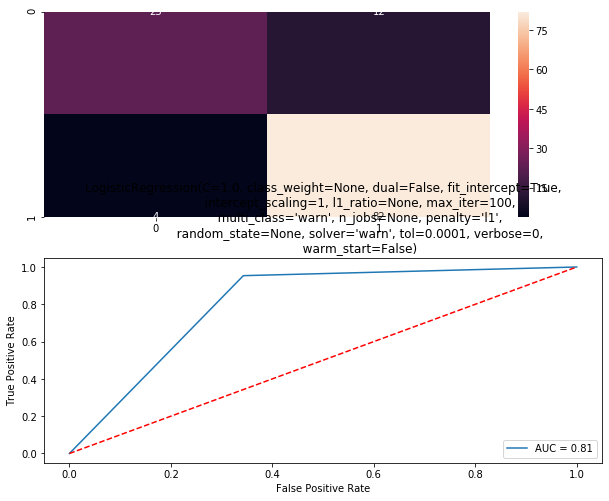

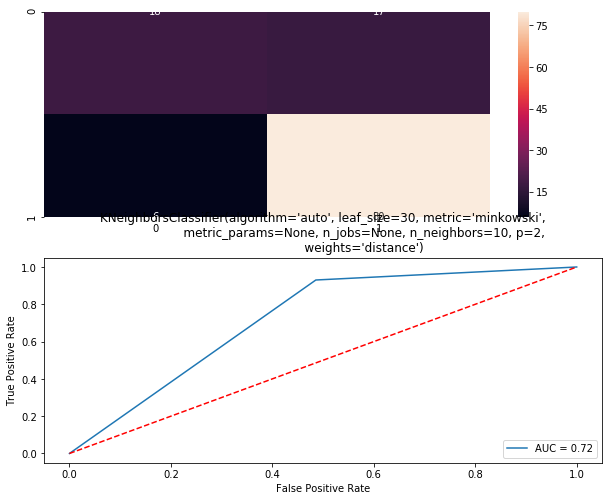

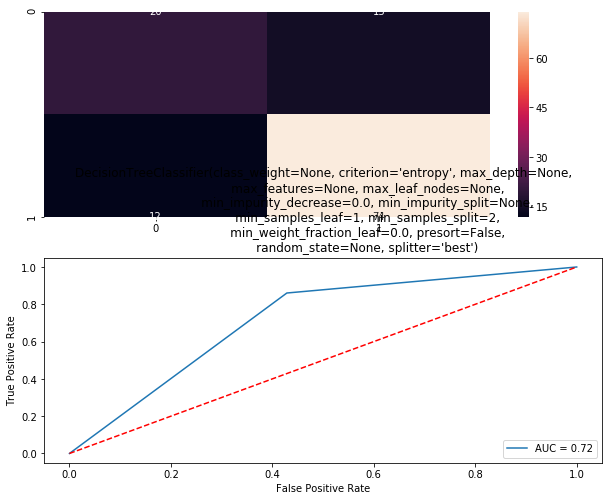

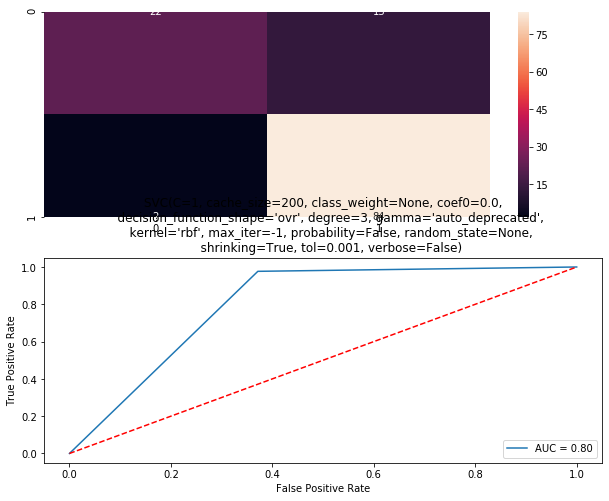

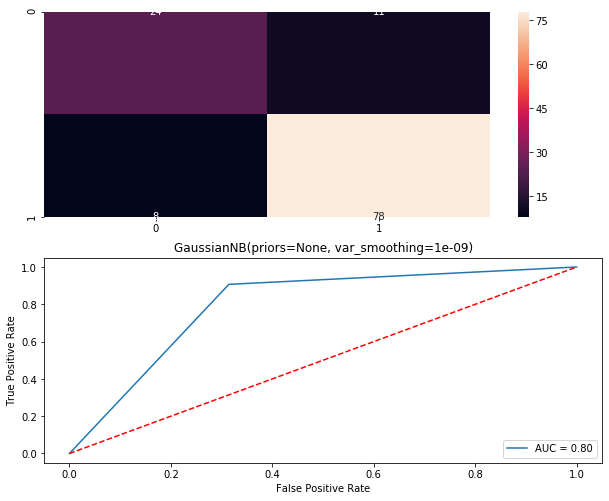

In [98]:
score=[]
cv=[]
rocscore=[]

algorithms=[LogisticRegression(penalty='l1'),KNeighborsClassifier(algorithm='auto', n_neighbors=10, weights='distance'),DecisionTreeClassifier(criterion= 'entropy', splitter= 'best'), SVC(C= 1, kernel='rbf'), GaussianNB() ]

for i in algorithms:
    print(i)
    i.fit(train_x,train_y)
    pred=i.predict(test_x)
    accscore=accuracy_score(test_y,pred)
    score.append(accscore)
    print("")
    print("The accuracy score is ", accscore)
    print("")
    cvscore=cross_val_score(i,x,y,cv=5,scoring='accuracy').mean()
    cv.append(cvscore)
    print("The cross val score is", cvscore)
    print()
    print(classification_report(test_y,pred))
    print()
    cm=confusion_matrix(test_y,pred)
    print(cm)
    print()
    false_positive_rate,true_positive_rate,thresholds=roc_curve(test_y,pred)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score',roc_auc)
    rocscore.append(roc_auc)
    print("\n")
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(i)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'%roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print("\n")
    print("\n")

In [99]:
result=pd.DataFrame({'Model':[LogisticRegression,KNeighborsClassifier, DecisionTreeClassifier, SVC,GaussianNB()],'Accuracy_Score':score,'Cross_val_score':cv, 'AUC_ROC':rocscore})
result

,Model,Accuracy_Score,Cross_val_score,AUC_ROC
0,<class 'sklearn.linear_model.logistic.Logistic...,0.867769,0.789154,0.805316
1,<class 'sklearn.neighbors.classification.KNeig...,0.809917,0.779196,0.722259
2,<class 'sklearn.tree.tree.DecisionTreeClassifi...,0.776860,0.712499,0.715947
3,<class 'sklearn.svm.classes.SVC'>,0.876033,0.800794,0.802658
4,"GaussianNB(priors=None, var_smoothing=1e-09)",0.842975,0.772543,0.796346


In [100]:
#Let us try ensemble try to achieve more accuracy

In [101]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
parameters={'n_estimators':(10,50,100,200,500)}
gdrf=GridSearchCV(rf,parameters)
gdrf.fit(train_x,train_y)
gdrf.best_params_

{'n_estimators': 200}

In [105]:
#checking the best accuracy score and random state for RandomForestClassifier
rf=RandomForestClassifier(n_estimators=200)
max_acc_score(rf,x,y)

The accuracy score at r_state 42 is 0.8347107438016529
The accuracy score at r_state 43 is 0.8016528925619835
The accuracy score at r_state 44 is 0.8347107438016529
The accuracy score at r_state 45 is 0.7603305785123967
The accuracy score at r_state 46 is 0.8512396694214877
The accuracy score at r_state 47 is 0.7768595041322314
The accuracy score at r_state 48 is 0.8181818181818182
The accuracy score at r_state 49 is 0.7272727272727273
The accuracy score at r_state 50 is 0.7603305785123967
The accuracy score at r_state 51 is 0.743801652892562
The accuracy score at r_state 52 is 0.768595041322314
The accuracy score at r_state 53 is 0.8099173553719008
The accuracy score at r_state 54 is 0.8264462809917356
The accuracy score at r_state 55 is 0.8347107438016529
The accuracy score at r_state 56 is 0.8181818181818182
The accuracy score at r_state 57 is 0.7520661157024794
The accuracy score at r_state 58 is 0.8512396694214877
The accuracy score at r_state 59 is 0.7603305785123967
The accuracy

0.8512396694214877

In [106]:
#checking the cross val score
cs=cross_val_score(rf,x,y,cv=5,scoring='accuracy').mean()
print("The cross val score of Random forest classifier is", cs)

The cross val score of Random forest classifier is 0.7891689237678543


In [107]:
from sklearn.ensemble import GradientBoostingClassifier
gc=GradientBoostingClassifier()
parameters={'learning_rate':(0.001,0.01,0.1,1),'n_estimators':(50,100,200,500),'criterion':('friedman_mse', 'mse', 'mae')}
gd=GridSearchCV(gc,parameters)
gd.fit(train_x,train_y)
gd.best_params_

{'criterion': 'mae', 'learning_rate': 0.01, 'n_estimators': 50}

In [109]:
#checking the best accuracy score and random state for RandomForestClassifier
gc=GradientBoostingClassifier(criterion='mae', learning_rate= 0.01, n_estimators= 50)
max_acc_score(gc,x,y)

The accuracy score at r_state 42 is 0.8347107438016529
The accuracy score at r_state 43 is 0.8181818181818182
The accuracy score at r_state 44 is 0.8264462809917356
The accuracy score at r_state 45 is 0.7520661157024794
The accuracy score at r_state 46 is 0.8181818181818182
The accuracy score at r_state 47 is 0.7768595041322314
The accuracy score at r_state 48 is 0.8264462809917356
The accuracy score at r_state 49 is 0.7520661157024794
The accuracy score at r_state 50 is 0.8016528925619835
The accuracy score at r_state 51 is 0.7851239669421488
The accuracy score at r_state 52 is 0.7851239669421488
The accuracy score at r_state 53 is 0.7933884297520661
The accuracy score at r_state 54 is 0.8429752066115702
The accuracy score at r_state 55 is 0.8181818181818182
The accuracy score at r_state 56 is 0.8429752066115702
The accuracy score at r_state 57 is 0.743801652892562
The accuracy score at r_state 58 is 0.8677685950413223
The accuracy score at r_state 59 is 0.7768595041322314
The accurac

0.8677685950413223

In [110]:
#checking the cross val score
cs=cross_val_score(gc,x,y,cv=5,scoring='accuracy').mean()
print("The cross val score of GradientBoosting classifier is", cs)

The cross val score of GradientBoosting classifier is 0.8057942681204713


In [111]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier()
parameters={'learning_rate':(0.001,0.01,0.1,1),'n_estimators':(50,100,200,500),'algorithm':('SAMME', 'SAMME.R')}
gd=GridSearchCV(ad,parameters)
gd.fit(train_x,train_y)
gd.best_params_

{'algorithm': 'SAMME', 'learning_rate': 0.001, 'n_estimators': 50}

In [113]:
#checking the best accuracy score and random state for AdaBoostClassifier
ada=AdaBoostClassifier(algorithm= 'SAMME', learning_rate= 0.001, n_estimators= 50)
max_acc_score(ada,x,y)

The accuracy score at r_state 42 is 0.8347107438016529
The accuracy score at r_state 43 is 0.8429752066115702
The accuracy score at r_state 44 is 0.8264462809917356
The accuracy score at r_state 45 is 0.7520661157024794
The accuracy score at r_state 46 is 0.8347107438016529
The accuracy score at r_state 47 is 0.7768595041322314
The accuracy score at r_state 48 is 0.8347107438016529
The accuracy score at r_state 49 is 0.7603305785123967
The accuracy score at r_state 50 is 0.8016528925619835
The accuracy score at r_state 51 is 0.7851239669421488
The accuracy score at r_state 52 is 0.8016528925619835
The accuracy score at r_state 53 is 0.7933884297520661
The accuracy score at r_state 54 is 0.8429752066115702
The accuracy score at r_state 55 is 0.8347107438016529
The accuracy score at r_state 56 is 0.8429752066115702
The accuracy score at r_state 57 is 0.7603305785123967
The accuracy score at r_state 58 is 0.8760330578512396
The accuracy score at r_state 59 is 0.7851239669421488
The accura

0.8842975206611571

In [114]:
#checking the cross val score
cs=cross_val_score(ada,x,y,cv=5,scoring='accuracy').mean()
print("The cross val score of AdaBoost classifier is", cs)

The cross val score of AdaBoost classifier is 0.810766719911105


In [118]:
result2=pd.DataFrame({'Boosters':['RandomForestClassifier','GradientBoostClassifier','AdaBoostRegressor'],'Accuracy Score':[0.85,0.867,0.88],'Cross_val_score':[0.79,0.805,0.81]})
result2

,Boosters,Accuracy Score,Cross_val_score
0,RandomForestClassifier,0.850,0.790
1,GradientBoostClassifier,0.867,0.805
2,AdaBoostRegressor,0.880,0.810


In [116]:
result

,Model,Accuracy_Score,Cross_val_score,AUC_ROC
0,<class 'sklearn.linear_model.logistic.Logistic...,0.867769,0.789154,0.805316
1,<class 'sklearn.neighbors.classification.KNeig...,0.809917,0.779196,0.722259
2,<class 'sklearn.tree.tree.DecisionTreeClassifi...,0.776860,0.712499,0.715947
3,<class 'sklearn.svm.classes.SVC'>,0.876033,0.800794,0.802658
4,"GaussianNB(priors=None, var_smoothing=1e-09)",0.842975,0.772543,0.796346


#by comparing the results, we can conclude that AdaBoost Regressor is giving better Accuracy and cross val scores, hence we can finalise the same.

In [122]:
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=95,test_size=0.20)
ada=AdaBoostClassifier(algorithm= 'SAMME', learning_rate= 0.001, n_estimators= 50)
ada.fit(train_x,train_y)
pred=ada.predict(test_x)
acs=accuracy_score(test_y,pred)
print("The accuracy score is", acs)
print()
cv=cross_val_score(ada,x,y,cv=5).mean()
print("The cross val score is", cv)
print()
pd.DataFrame(pred).to_csv("Project7_Loan_Predictions.csv")

The accuracy score is 0.8842975206611571

The cross val score is 0.810766719911105



In [123]:
#Saving the model
from sklearn.externals import joblib
joblib.dump(ada,"Project7_Loan prediction.pkl")

['Project7_Loan prediction.pkl']